In [1]:
# My code
import fast_gillespie as fg
import fast_gillespie_viz as fgv


In [2]:
# Define linear homodimer

# Create fields
A = fg.Field(name='A', index_dim=1)
a = fg.Field(name='a', index_dim=1)
I = fg.Field(name='I', index_dim=2, index_constraint=lambda i: i[0] < i[1])

mean_num_monomers = 100.0
mean_num_interactions = 50.0

# Create rules
R_1 = fg.MonomerCreationRule(name='R_1', 
                             rate=mean_num_monomers, 
                             particle=A, 
                             sites=[a])
R_2 = fg.MonomerAnnihilationRule(name='R_2', 
                                 rate=1.0, 
                                 particle=A, 
                                 sites=[a])
R_3 = fg.HomotypicInteractionCreationRule(name='R_3', 
                                          rate=mean_num_interactions/(mean_num_monomers*(mean_num_monomers-1)/2), 
                                          A=A, a=a, I=I)
R_4 = fg.HomotypicInteractionAnnihilationRule(name='R_4', 
                                              rate=1.0, 
                                              A=A, a=a, I=I)       

# Define fock space and rules
space = fg.FockSpace(fields=[A, a, I])
rules = fg.RuleSet(rules=[R_1, R_2, R_3, R_4])

def summary_stats_func():
    particle_field_indices = set(i[0] for i in A.indices)
    interaction_indices = set(i[0] for i in I.indices) | set(i[1] for i in I.indices)
    monomer_indices = particle_field_indices - interaction_indices
    stats_dict = dict(
        num_A=len(A.indices),
        num_I=len(I.indices),
        num_M=len(monomer_indices),
    )
    return stats_dict

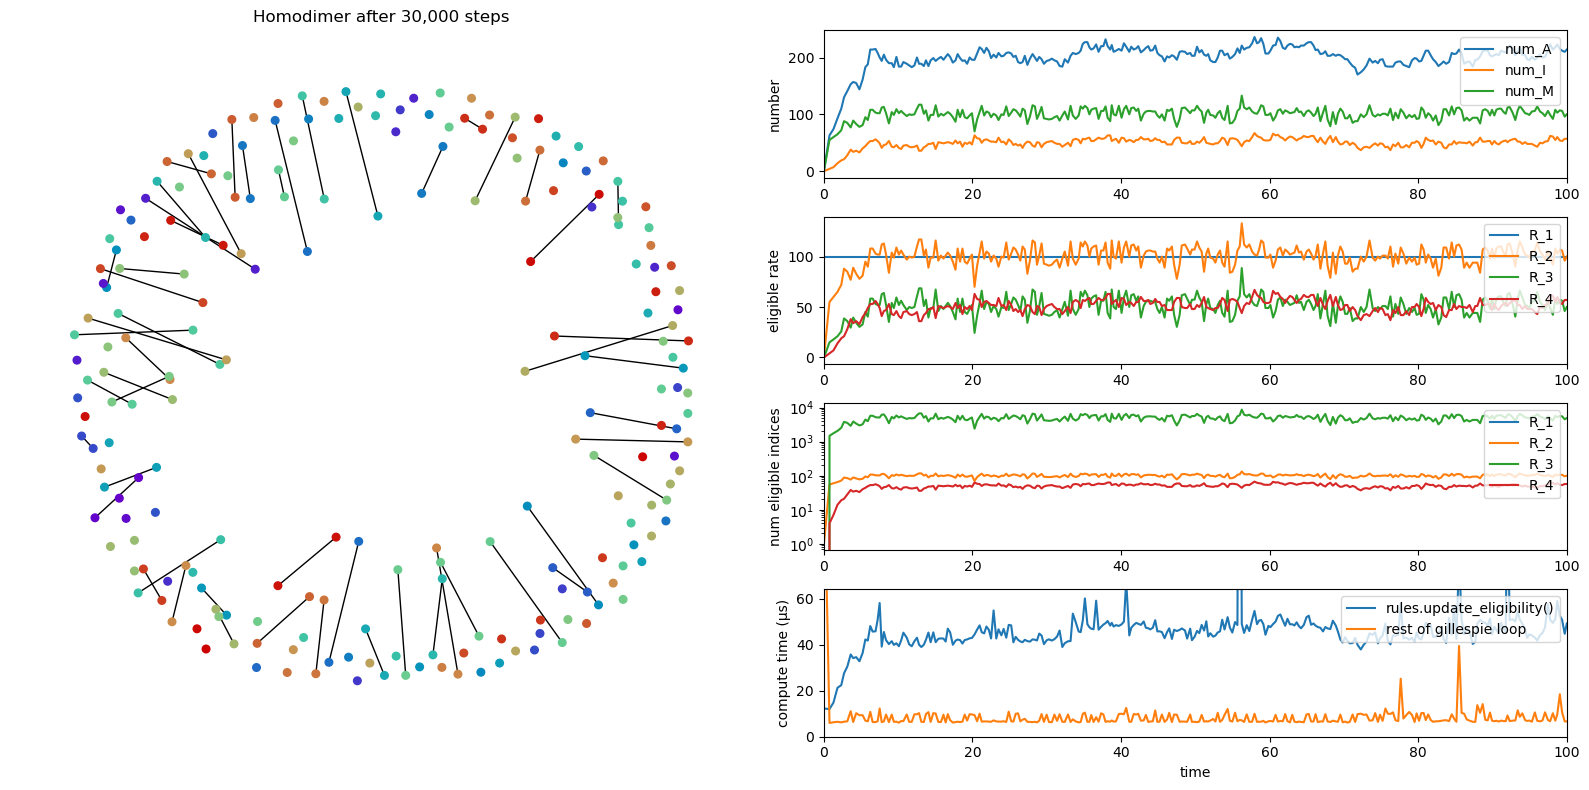

In [3]:
# Define, initialize, and run simulation
sim = fg.Simulation(space=space, rules=rules, custom_stats_func=summary_stats_func)
sim.initialize_state()
sim.run(num_steps=30_000, record_every=100)

fgv.show_sim_stats(sim, particle=A, interaction=I, directed=False, x_is_time=True, system_name='Homodimer')